# Reusable Machine Learning Pipeline Template
By Isra Mekki, Gerome Vivar and Erinc Merdivan

## Motivation

### Real world Machine Learning systems:
![real world ml systems](https://github.com/HelmholtzAI-Consultants-Munich/ML-Pipeline-Template/tree/main/reports/figures/Screenshot%202022-03-18%20at%2010.11.08.png)
Sculley, D., Holt, G., Golovin, D., Davydov, E., Phillips, T., Ebner, D., ... & Dennison, D. (2015). Hidden technical debt in machine learning systems. Advances in neural information processing systems, 28.
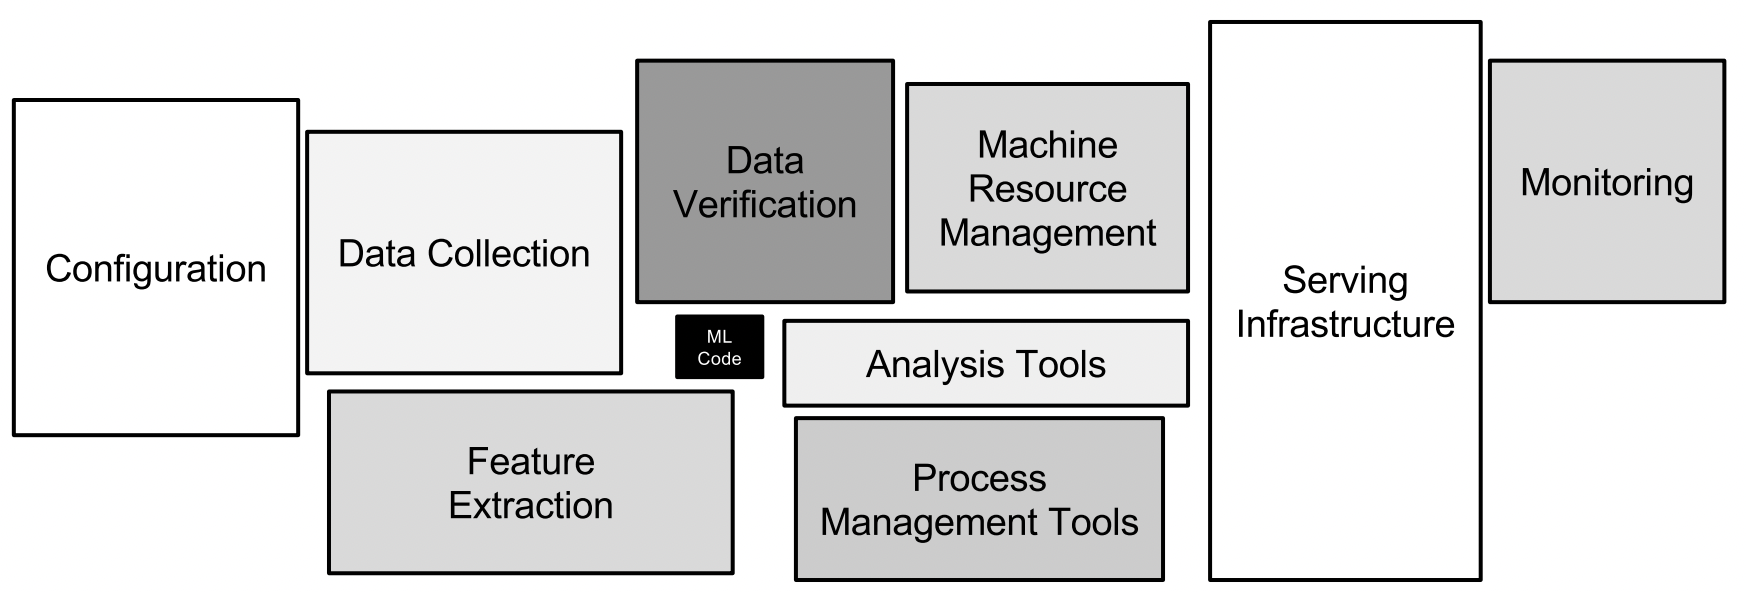

### Often, researchers tend to:
* Focus on model performance and need to experiment fast
* Having well structured and clean code gets deprioitized

### As a result:
* Difficulty to make experiments reproducible and tractable 
* Difficulty to add new features

## Machine Learning Pipeline template based on [pyscaffold datascience](https://github.com/pyscaffold/pyscaffoldext-dsproject) and [lightning-hydra](https://github.com/ashleve/lightning-hydra-template) 

## Key objectives:
* Start Machine Learning projects with a nice structure
* Use the project as a package
* Easily submit experiments to Slurm or run them locally
* Promote the use of best practices for clean and reusable code
* Automate machine learning experiments and make them reproducible
* Automatically generate documentation

### Project structure
![template_structure.png](https://github.com/HelmholtzAI-Consultants-Munich/ML-Pipeline-Template/tree/main/reports/figures/template_structure.png)
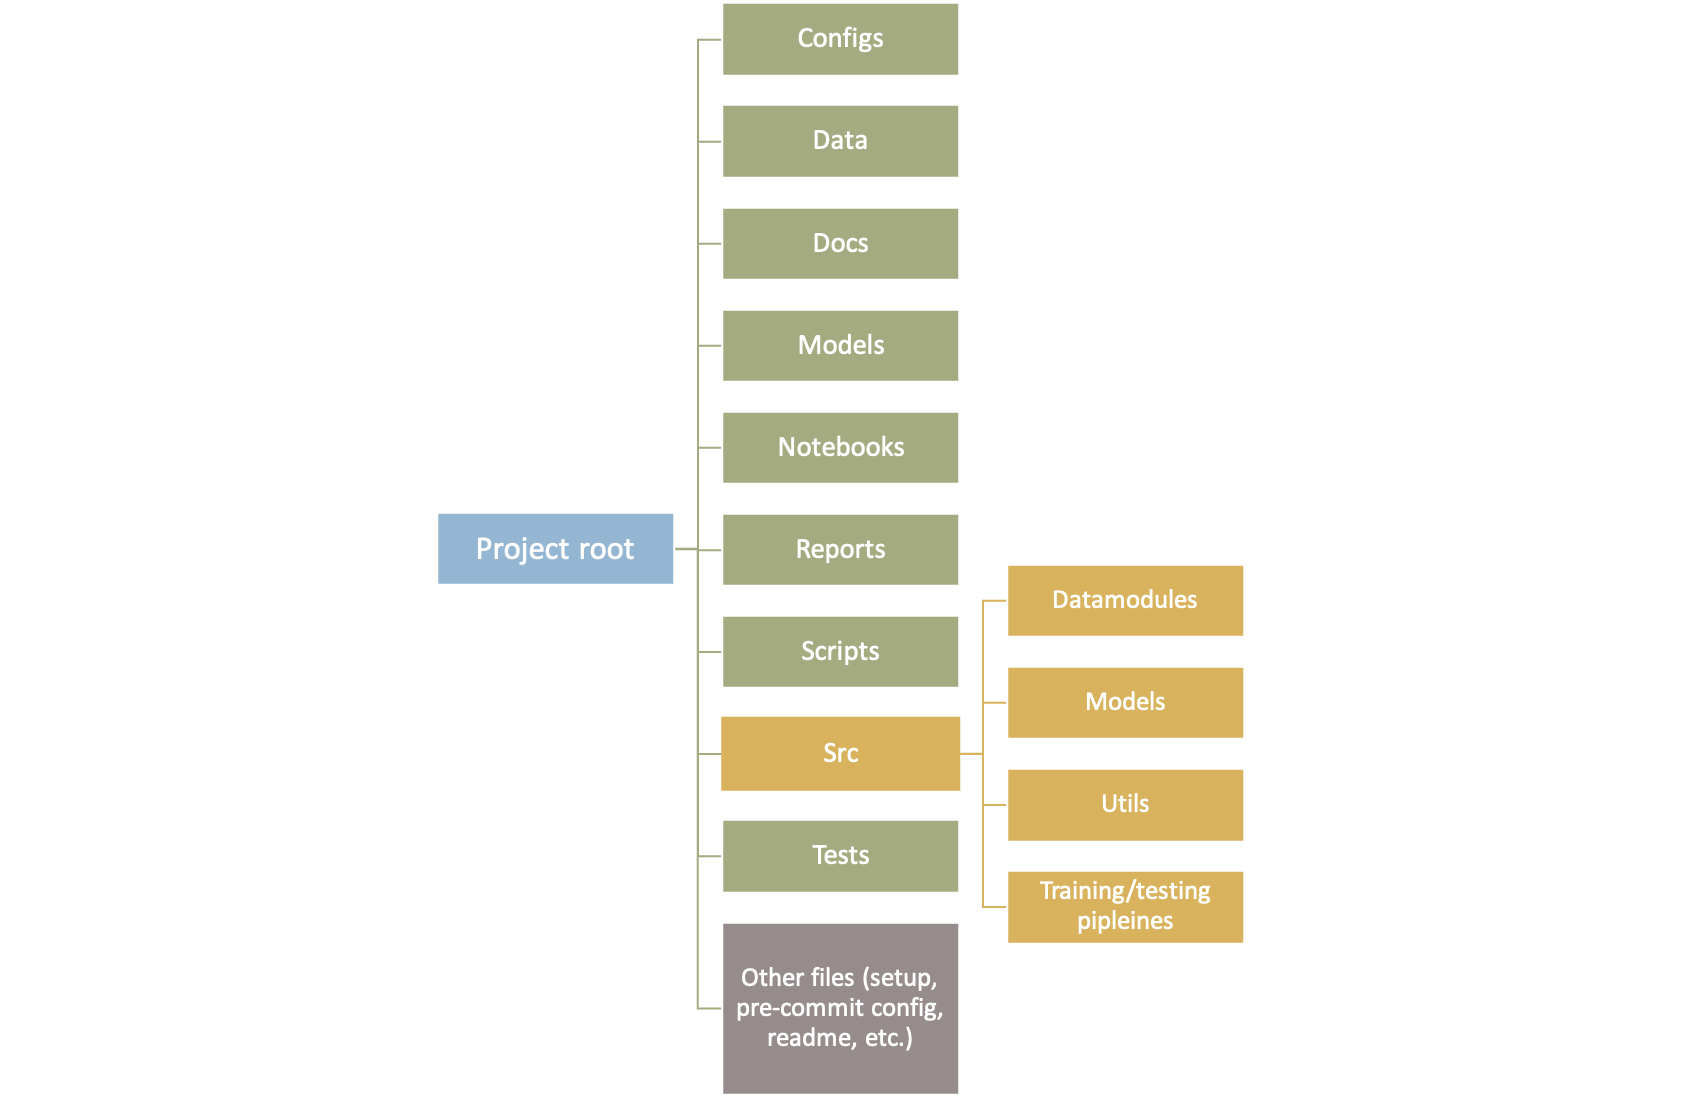

## Best practices for coding

* Use the appropriate git workflow (depending on the project) https://www.atlassian.com/git/tutorials/comparing-workflows
* Use pre-commit hooks for automatic code formatting
* Single responsibility principle: each module should only do one thing
* Don't repeat yourself
* Use explicit and clear variable names
* Document your code

### Generated documentation using template
![doc](https://github.com/HelmholtzAI-Consultants-Munich/ML-Pipeline-Template/tree/main/reports/figures/Screenshot%202022-03-21%20at%2017.18.10.png)
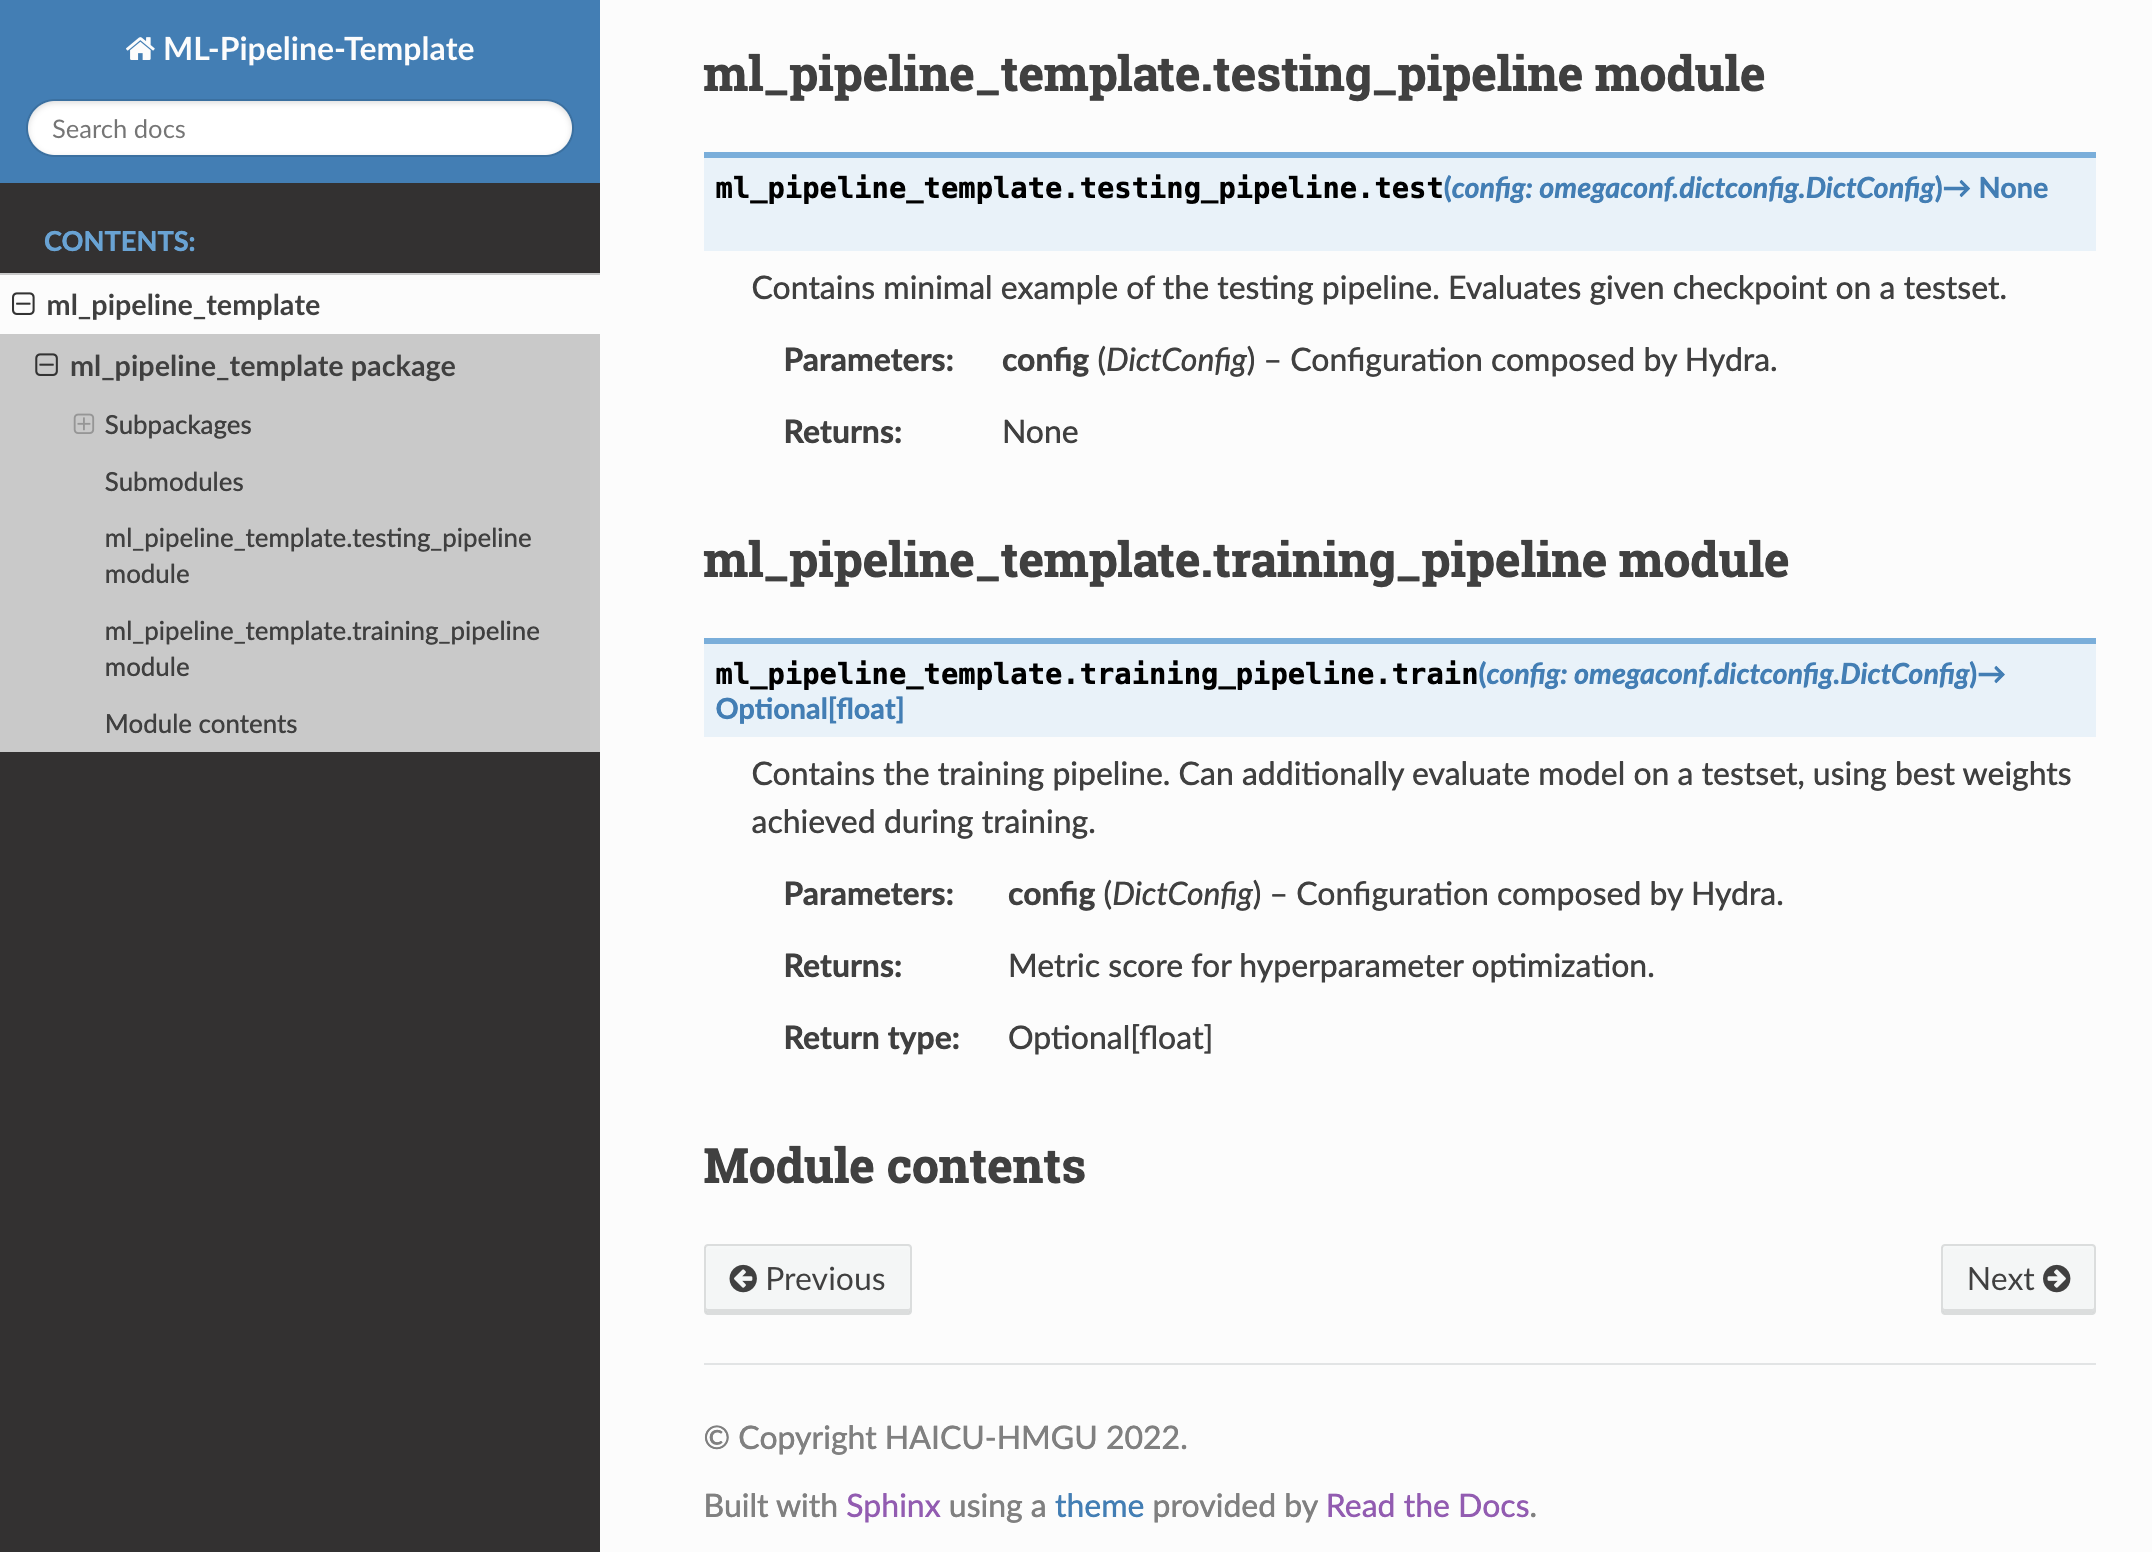

## ML experiments automation and reproducibility
### ML reproducibility standards
![reproducibility standards](https://github.com/HelmholtzAI-Consultants-Munich/ML-Pipeline-Template/tree/main/reports/figures/Screenshot%202022-03-22%20at%2008.49.34.png)
Heil, B. J., Hoffman, M. M., Markowetz, F., Lee, S. I., Greene, C. S., & Hicks, S. C. (2021). Reproducibility standards for machine learning in the life sciences. Nature Methods, 18(10), 1132-1135.
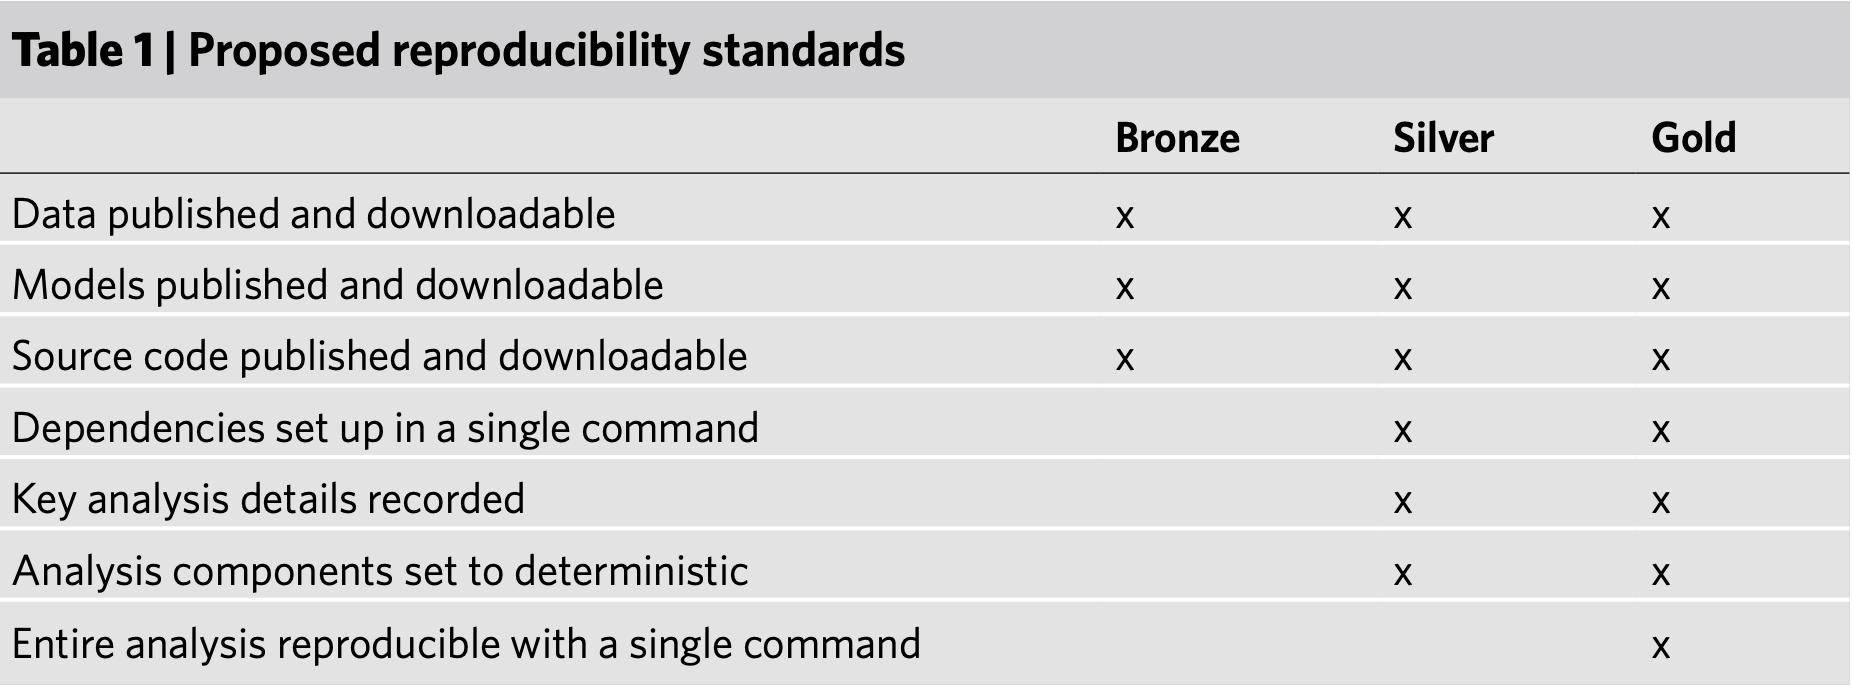

## Best practices for ML experiments
* Put raw data in .gitignore (can be checked through pre-commit hooks)
* Separate the raw data from the processed
* Start experimenting with very simple models
* Perform fast development runs on a small proportion of the data
* Use tools to perform automatic hyper parameter search (optuna)
* Track experiments (MLFlow)
* Use configurations for parameters (nothing should be hard coded)


For more, see: Amershi, S., Begel, A., Bird, C., DeLine, R., Gall, H., Kamar, E., ... & Zimmermann, T. (2019, May). Software engineering for machine learning: A case study. In 2019 IEEE/ACM 41st International Conference on Software Engineering: Software Engineering in Practice (ICSE-SEIP) (pp. 291-300). IEEE.

### Configurations in the template
![configs.png](https://github.com/HelmholtzAI-Consultants-Munich/ML-Pipeline-Template/tree/main/reports/figures/configs.png)
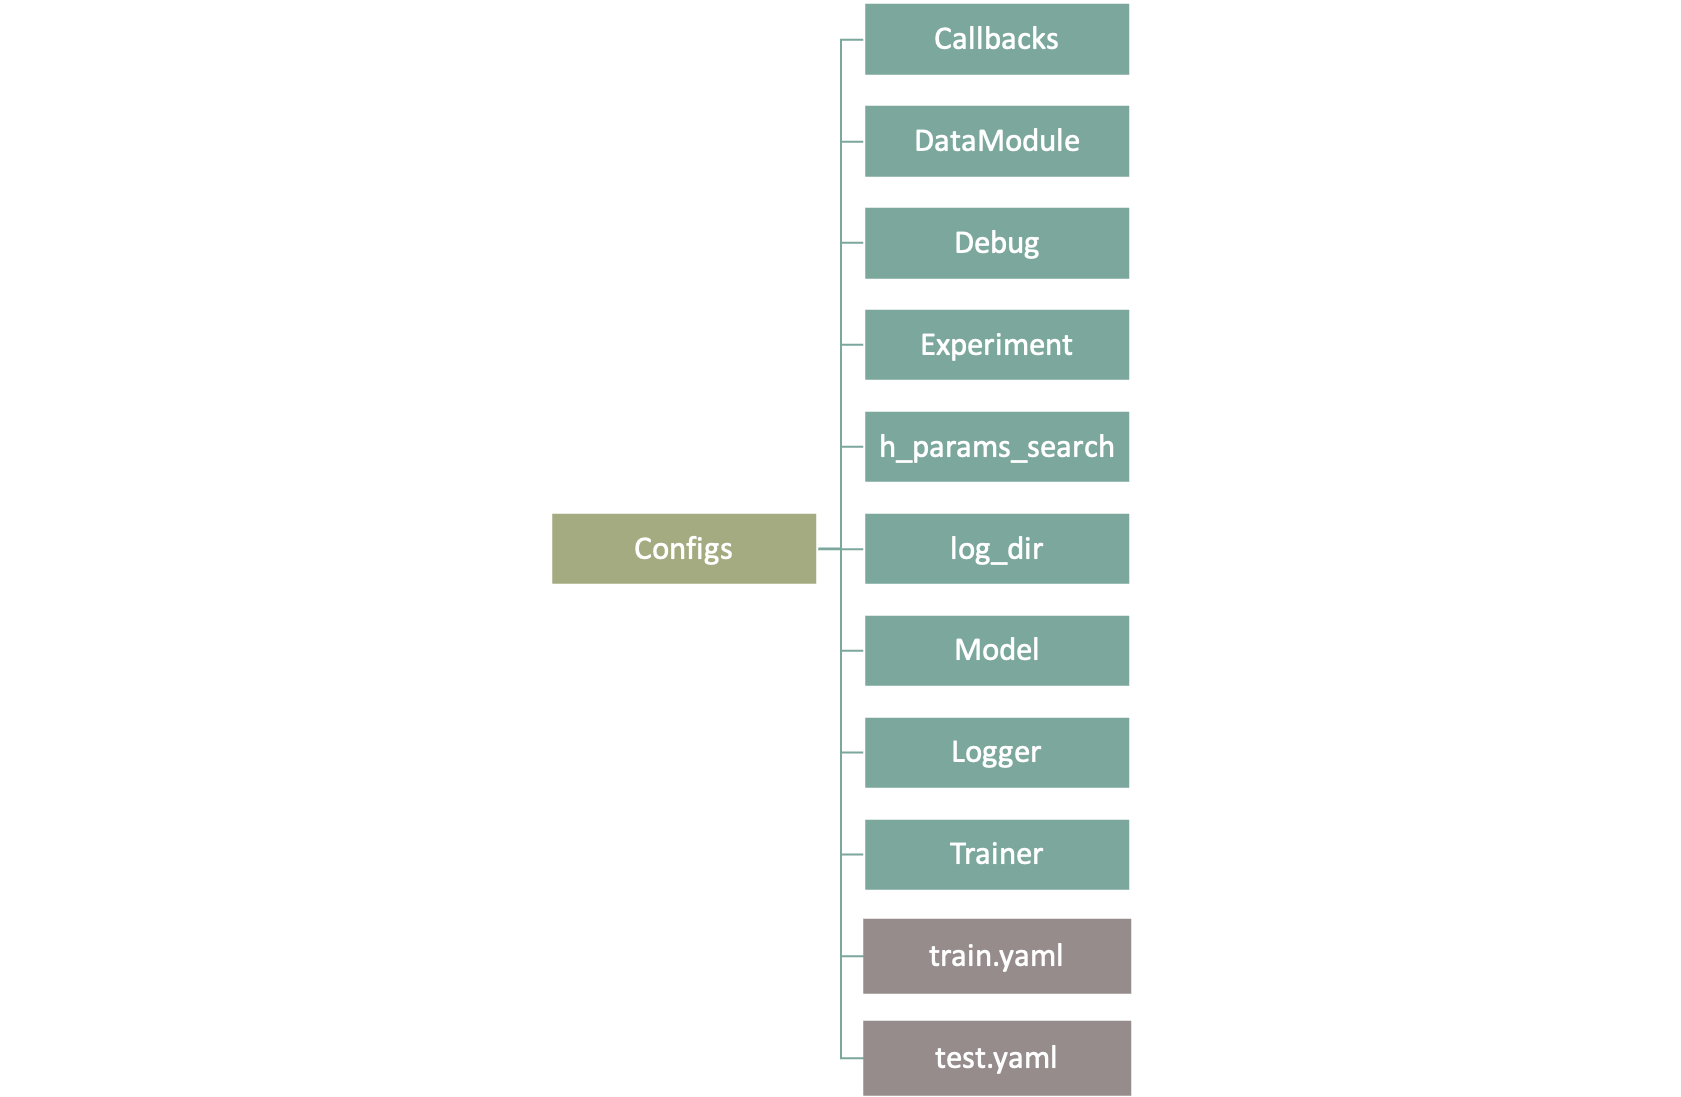

### Example of a configuration file
`callbacks/default.yaml`

In [ ]:
model_checkpoint:
  _target_: pytorch_lightning.callbacks.ModelCheckpoint
  monitor: "val/acc" # name of the logged metric which determines when model is improving
  mode: "max" # "max" means higher metric value is better, can be also "min"
  save_top_k: 1 # save k best models (determined by above metric)
  save_last: True # additionaly always save model from last epoch
  verbose: False
  dirpath: "checkpoints/"
  filename: "epoch_{epoch:03d}"
  auto_insert_metric_name: False

early_stopping:
  _target_: pytorch_lightning.callbacks.EarlyStopping
  monitor: "val/acc" # name of the logged metric which determines when model is improving
  mode: "max" # "max" means higher metric value is better, can be also "min"
  patience: 100 # how many validation epochs of not improving until training stops
  min_delta: 0 # minimum change in the monitored metric needed to qualify as an improvement

model_summary:
  _target_: pytorch_lightning.callbacks.RichModelSummary
  max_depth: -1

rich_progress_bar:
  _target_: pytorch_lightning.callbacks.RichProgressBar

## Future work

* Do data version control (DVC https://dvc.org/)
* Adapt the template to support sklearn based projects (classical ML tasks)